# Project Final Report

# (1)주제 선정 이유

[https://www.mk.co.kr/news/economy/view/2017/07/473600/](https://www.mk.co.kr/news/economy/view/2017/07/473600/)
![용인시기사](../yongin.png)


은퇴 후 살기 좋은 도시 10개 중에 용인이 선정되었다는 기사를 보고 실제로 그런지 입증하기 위해 용인시의 통계자료를 분석해<br>

**1) 타 도시와 용인시의 범죄율 비교**<br>
**2) 타 도시와 용인시의 교통사고 비율 비교**<br> 등을 통해 인구 밀도와 범죄율, 교통사고 비율의 상관성에 대해 보이고자 한다.<br>
이 때 타 도시는 경남 부산광역시, 경북 대구광역시, 강원 강릉시, 인천광역시로 설정하고, <br>
살기 좋은 도시이면 인구 밀도가 높을 것이라 가정했다.
___

# (2)가설 정의

* 범죄율이 낮을 수록 인구 밀도가 높을 것이다.
* 교통사고 비율이 낮을 수록 인구 밀도가 높을 것이다.
___

# (3) 인터넷을 통한 데이터 획득

* 통계청, 공공데이터포털, 행정안전부 주민등록 인구 통계 등의 통계 사이트에서 범죄 발생 횟수나 교통사고 건수, 인구수 등을 긁어온다.
* 여러 사이트에서 긁어 온 정보를 가공하여, 분석이 가능하게끔 정리한다.
* 범죄율, 교통사고 비율 등 여러 변수의 상관 관계를 정리하고,인과관계가 있는지 등을 분석한다.
* 그래프나 차트, 입체 그래프 등 여러가지 방법을 활용하여 데이터를 정리하고 시각화한다.
___
___

# (4) 분석을 위한 데이터 가공

### 1) 타 도시와 용인시의 인구 밀도 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                        

In [2]:
area = pd.read_csv('../data/2000_area.csv', index_col = 1, encoding = 'CP949')
busan_area_df = pd.DataFrame(area.iloc[6,2:3])
busan_area_df = busan_area_df.rename(index = {'2000': '면적'})
busan_area_df

,부산
면적,759.86


In [3]:
daegu_area_df = pd.DataFrame(area.iloc[7,2:3])
daegu_area_df = daegu_area_df.rename(index = {'2000': '면적'})
daegu_area_df

,대구
면적,885.61


In [4]:
incheon_area_df = pd.DataFrame(area.iloc[8,2:3])
incheon_area_df = incheon_area_df.rename(index = {'2000': '면적'})
incheon_area_df

,인천
면적,964.53


In [5]:
area = pd.read_csv('../data/2000_area.csv', index_col = 2, encoding = 'CP949')
yongin_area_df = pd.DataFrame(area.iloc[18,2:3])
yongin_area_df = yongin_area_df.rename(index = {'2000' : '면적'})
yongin_area_df = yongin_area_df.rename(columns = {'용인시' : '용인'})
yongin_area_df

,용인
면적,591.53


In [6]:
gangneung_area_df = pd.DataFrame(area.iloc[41,2:3])
gangneung_area_df = gangneung_area_df.rename(index = {'2000': '면적'})
gangneung_area_df = gangneung_area_df.rename(columns = {'강릉시' : '강릉'})
gangneung_area_df

,강릉
면적,1040.09


In [7]:
area = pd.concat([yongin_area_df, gangneung_area_df, busan_area_df, daegu_area_df, incheon_area_df], axis = 1)
area = area.astype(np.float64)
area

,용인,강릉,부산,대구,인천
면적,591.53,1040.09,759.86,885.61,964.53


In [8]:
population_density = pd.read_csv('../data/pop_density_19_04.csv', index_col = 0, encoding = 'CP949')
population = pd.DataFrame(population_density.iloc[0:1, :])
population = population.astype(np.float64)
population

,용인,강릉,부산,대구,인천
인구수,1042229.0,213106.0,3431750.0,2454154.0,2956700.0


In [9]:
population_density = pd.read_csv('../data/pop_density_19_04.csv', index_col = 0, encoding = 'CP949')
den_df = pd.DataFrame(population_density)
den_df = den_df.loc["인구밀도"]
den_df = pd.DataFrame(den_df)
den_df = den_df.T
den_df

,용인,강릉,부산,대구,인천
인구밀도,1762.31,204.91,4456.82,2777.76,2781.47


### 2) 타 도시와 용인시의 범죄율 비교

In [10]:
crime_2008 = pd.read_csv('../data/2008_crime.csv', index_col = 0, encoding = 'CP949')
df = pd.DataFrame(crime_2008)
row_df = df.iloc[[0,6,7,9,10]]
col_df1 = row_df.loc[:,['강릉','용인']]
col_df2 = row_df.iloc[:,26:59]
new_df_2008 = pd.merge(col_df1, col_df2, how = "outer", left_index = True, right_index = True)
new_df_2008

,강릉,용인,부산광역시 서구,부산광역시 동구,부산광역시 영도,부산광역시 부산진,부산광역시 동래,부산광역시 남구,부산광역시 북구,부산광역시 해운대,...,인천광역시 중구,인천광역시 동구,인천광역시 서구,인천광역시 남구,인천광역시 연수,인천광역시 남동,인천광역시 부평,인천광역시 계양,인천광역시 강화,인천광역시 웅진
2008년,,,,,,,,,,,,,,,,,,,,,
절도,"1,338","2,784",898,791,541,"1,630",653,920,"1,200","1,271",...,471,206,"1,561","2,317","1,311","1,279","2,385","1,117",146,27
살인,4,10,5,3,5,9,13,12,9,14,...,5,2,9,7,7,9,9,9,-,-
강도,27,36,17,26,7,100,24,75,26,57,...,16,11,22,56,22,42,63,41,2,1
강간,74,144,39,46,37,166,62,79,88,132,...,35,17,111,140,83,143,219,98,14,3
폭행,673,877,185,227,207,821,458,228,328,715,...,235,95,850,999,540,841,"1,232",756,118,20


In [11]:
crime_2010 = pd.read_csv('../data/2010_crime.csv', index_col = 0, encoding = 'CP949')
df = pd.DataFrame(crime_2010)
row_df = df.iloc[[0,6,7,9,10]]
col_df1 = row_df.loc[:,['강릉','용인']]
col_df2 = row_df.iloc[:,26:59]
new_df_2010 = pd.merge(col_df1, col_df2, how = "outer", left_index = True, right_index = True)
new_df_2010

,강릉,용인,부산광역시 서구,부산광역시 동구,부산광역시 영도,부산광역시 부산진,부산광역시 동래,부산광역시 남구,부산광역시 북구,부산광역시 해운대,...,인천광역시 중구,인천광역시 동구,인천광역시 서구,인천광역시 남구,인천광역시 연수,인천광역시 남동,인천광역시 부평,인천광역시 계양,인천광역시 강화,인천광역시 웅진
2010년,,,,,,,,,,,,,,,,,,,,,
절도,"1,227","2,424",975,"1,071",859,"3,214","1,786","1,291","1,232","2,239",...,538,292,"1,552","1,856",871,"1,382","2,478","1,379",154,20
살인,3,10,4,10,2,10,7,13,15,16,...,10,5,10,9,5,12,4,10,1,-
강도,34,37,23,20,7,71,34,44,69,52,...,19,5,38,52,17,56,89,20,2,2
강간,91,189,40,76,93,262,124,108,147,211,...,63,21,140,191,96,165,308,132,16,4
폭행,840,959,171,287,209,790,491,231,283,741,...,275,119,807,"1,008",583,786,"1,167",749,155,20


In [12]:
new = new_df_2008['용인']
new_yongin_df_2008 = pd.DataFrame(new)
new_yongin_df_2008 = new_yongin_df_2008.T
new_yongin_df_2008

2008년,절도,살인,강도,강간,폭행
용인,"2,784",10,36,144,877


In [13]:
new = new_df_2008['강릉']
new_gangneung_df_2008 = pd.DataFrame(new)
new_gangneung_df_2008 = new_gangneung_df_2008.T
new_gangneung_df_2008

2008년,절도,살인,강도,강간,폭행
강릉,"1,338",4,27,74,673


In [14]:
new_busan_df_2008 = new_df_2008.iloc[:, 2:17]
new_busan_df_2008 = new_busan_df_2008.apply(lambda x: x.str.replace(',',''))
new_busan_df_2008 = new_busan_df_2008.astype(np.float64).T.describe().iloc[1]
new_busan_df_2008 = pd.DataFrame(new_busan_df_2008)
new_busan_df_2008 = new_busan_df_2008.rename(columns = {'mean': '부산'})
new_busan_df_2008 = new_busan_df_2008.T
new_busan_df_2008

2008년,절도,살인,강도,강간,폭행
부산,948.066667,7.533333,34.6,71.6,341.666667


In [15]:
new_daegu_df_2008 = new_df_2008.iloc[:, 18:25]
new_daegu_df_2008 = new_daegu_df_2008.apply(lambda x: x.str.replace(',',''))
new_daegu_df_2008 = new_daegu_df_2008.astype(np.float64).T.describe().iloc[1]
new_daegu_df_2008 = pd.DataFrame(new_daegu_df_2008)
new_daegu_df_2008 = new_daegu_df_2008.rename(columns = {'mean': '대구'})
new_daegu_df_2008 = new_daegu_df_2008.T
new_daegu_df_2008

2008년,절도,살인,강도,강간,폭행
대구,1168.714286,4.285714,29.0,67.142857,789.857143


In [16]:
new_incheon_df_2008 = new_df_2008.iloc[:, 26:35]
new_incheon_df_2008 = new_incheon_df_2008.apply(lambda x: x.str.replace(',',''))
new_incheon_df_2008 = new_incheon_df_2008.apply(lambda x: x.str.replace('-','0'))
new_incheon_df_2008 = new_incheon_df_2008.astype(np.float64).T.describe().iloc[1]
new_incheon_df_2008 = pd.DataFrame(new_incheon_df_2008)
new_incheon_df_2008 = new_incheon_df_2008.rename(columns = {'mean': '인천'})
new_incheon_df_2008 = new_incheon_df_2008.T
new_incheon_df_2008

2008년,절도,살인,강도,강간,폭행
인천,1149.888889,5.777778,28.888889,92.0,605.666667


In [17]:
new = new_df_2010['용인']
new_yongin_df_2010 = pd.DataFrame(new)
new_yongin_df_2010 = new_yongin_df_2010.T
new_yongin_df_2010

2010년,절도,살인,강도,강간,폭행
용인,"2,424",10,37,189,959


In [18]:
new = new_df_2010['강릉']
new_gangneung_df_2010 = pd.DataFrame(new)
new_gangneung_df_2010 = new_gangneung_df_2010.T
new_gangneung_df_2010

2010년,절도,살인,강도,강간,폭행
강릉,"1,227",3,34,91,840


In [19]:
new_busan_df_2010 = new_df_2010.iloc[:, 2:17]
new_busan_df_2010 = new_busan_df_2010.apply(lambda x: x.str.replace(',',''))
new_busan_df_2010 = new_busan_df_2010.astype(np.float64).T.describe().iloc[1]
new_busan_df_2010 = pd.DataFrame(new_busan_df_2010)
new_busan_df_2010 = new_busan_df_2010.rename(columns = {'mean': '부산'})
new_busan_df_2010 = new_busan_df_2010.T
new_busan_df_2010

2010년,절도,살인,강도,강간,폭행
부산,1474.866667,8.266667,34.133333,118.266667,335.133333


In [20]:
new_daegu_df_2010 = new_df_2010.iloc[:, 18:25]
new_daegu_df_2010 = new_daegu_df_2010.apply(lambda x: x.str.replace(',',''))
new_daegu_df_2010 = new_daegu_df_2010.astype(np.float64).T.describe().iloc[1]
new_daegu_df_2010 = pd.DataFrame(new_daegu_df_2010)
new_daegu_df_2010 = new_daegu_df_2010.rename(columns = {'mean': '대구'})
new_daegu_df_2010 = new_daegu_df_2010.T
new_daegu_df_2010

2010년,절도,살인,강도,강간,폭행
대구,2053.0,6.285714,22.714286,109.857143,797.857143


In [21]:
new_incheon_df_2010 = new_df_2010.iloc[:, 26:35]
new_incheon_df_2010 = new_incheon_df_2010.apply(lambda x: x.str.replace(',',''))
new_incheon_df_2010 = new_incheon_df_2010.apply(lambda x: x.str.replace('-','0'))
new_incheon_df_2010 = new_incheon_df_2010.astype(np.float64).T.describe().iloc[1]
new_incheon_df_2010 = pd.DataFrame(new_incheon_df_2010)
new_incheon_df_2010 = new_incheon_df_2010.rename(columns = {'mean': '인천'})
new_incheon_df_2010 = new_incheon_df_2010.T
new_incheon_df_2010

2010년,절도,살인,강도,강간,폭행
인천,1109.333333,6.222222,31.222222,119.222222,599.333333


#### 2008년과 2010년의 5개 도시의 평균 범죄 건수

In [22]:
yongin = pd.concat([new_yongin_df_2008, new_yongin_df_2010], ignore_index = False)
print(yongin)
yongin_mean = yongin.apply(lambda x: x.str.replace(',','')).astype(np.int64).describe().iloc[1]
yongin_mean = pd.DataFrame(yongin_mean)
yongin_mean = yongin_mean.rename(columns = {'mean': '용인'})
yongin_mean = yongin_mean.T
yongin_mean

      절도   살인   강도   강간   폭행 
용인  2,784   10   36  144  877
용인  2,424   10   37  189  959


,절도,살인,강도,강간,폭행
용인,2604.0,10.0,36.5,166.5,918.0


In [23]:
gangneung = pd.concat([new_gangneung_df_2008, new_gangneung_df_2010], ignore_index = False)
print(gangneung)
gangneung_mean = gangneung.apply(lambda x: x.str.replace(',','')).astype(np.int64).describe().iloc[1]
gangneung_mean = pd.DataFrame(gangneung_mean)
gangneung_mean = gangneung_mean.rename(columns = {'mean': '강릉'})
gangneung_mean = gangneung_mean.T
gangneung_mean

      절도   살인   강도   강간   폭행 
강릉  1,338    4   27   74  673
강릉  1,227    3   34   91  840


,절도,살인,강도,강간,폭행
강릉,1282.5,3.5,30.5,82.5,756.5


In [24]:
busan = pd.concat([new_busan_df_2008, new_busan_df_2010], ignore_index = False)
print(busan)
busan_mean = busan.astype(np.float64).describe().iloc[1]
busan_mean = pd.DataFrame(busan_mean)
busan_mean = busan_mean.rename(columns = {'mean': '부산'})
busan_mean = busan_mean.T
busan_mean

            절도        살인         강도          강간          폭행 
부산   948.066667  7.533333  34.600000   71.600000  341.666667
부산  1474.866667  8.266667  34.133333  118.266667  335.133333


,절도,살인,강도,강간,폭행
부산,1211.466667,7.9,34.366667,94.933333,338.4


In [25]:
daegu = pd.concat([new_daegu_df_2008, new_daegu_df_2010], ignore_index = False)
print(daegu)
daegu_mean = daegu.astype(np.float64).describe().iloc[1]
daegu_mean = pd.DataFrame(daegu_mean)
daegu_mean = daegu_mean.rename(columns = {'mean': '대구'})
daegu_mean = daegu_mean.T
daegu_mean

            절도        살인         강도          강간          폭행 
대구  1168.714286  4.285714  29.000000   67.142857  789.857143
대구  2053.000000  6.285714  22.714286  109.857143  797.857143


,절도,살인,강도,강간,폭행
대구,1610.857143,5.285714,25.857143,88.5,793.857143


In [26]:
incheon = pd.concat([new_incheon_df_2008, new_incheon_df_2010], ignore_index = False)
print(incheon)
incheon_mean = incheon.astype(np.float64).describe().iloc[1]
incheon_mean = pd.DataFrame(incheon_mean)
incheon_mean = incheon_mean.rename(columns = {'mean': '인천'})
incheon_mean = incheon_mean.T
incheon_mean

            절도        살인         강도          강간          폭행 
인천  1149.888889  5.777778  28.888889   92.000000  605.666667
인천  1109.333333  6.222222  31.222222  119.222222  599.333333


,절도,살인,강도,강간,폭행
인천,1129.611111,6.0,30.055556,105.611111,602.5


In [27]:
crime = pd.concat([yongin_mean, gangneung_mean, busan_mean, daegu_mean, incheon_mean], ignore_index = False)
crime

,절도,살인,강도,강간,폭행
용인,2604.000000,10.000000,36.500000,166.500000,918.000000
강릉,1282.500000,3.500000,30.500000,82.500000,756.500000
부산,1211.466667,7.900000,34.366667,94.933333,338.400000
대구,1610.857143,5.285714,25.857143,88.500000,793.857143
인천,1129.611111,6.000000,30.055556,105.611111,602.500000


### 3) 타 도시와 용인시의 교통사고 비율 비교

In [28]:
traffic_2015 = pd.read_csv('../data/2015_traffic_accident.csv', index_col = 0, encoding = 'CP949')
df = pd.DataFrame(traffic_2015)
row1_df = df.loc[['부산']]
row1_df

,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,,,
부산,중구,01월,41,1,58,15,38,5
부산,중구,02월,20,1,21,7,13,1
부산,중구,03월,29,0,38,8,28,2
부산,중구,04월,33,0,53,16,31,6
부산,중구,05월,42,1,63,21,33,9
부산,중구,06월,20,0,23,12,11,0
부산,중구,07월,32,0,51,14,33,4
부산,중구,08월,25,0,31,7,20,4
부산,중구,09월,23,1,32,16,15,1


In [29]:
busan = row1_df.describe()
busan_traffic = busan.iloc[[1]]
busan_traffic = busan_traffic.rename(index = {'mean': '부산'})
busan_traffic

,발생건수,사망자수,부상자수,중상,경상,부상신고
부산,66.442708,0.927083,93.145833,29.932292,55.213542,8.0


In [30]:
row2_df = df.loc[['대구']]
row2_df

,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,,,
대구,중구,01월,73,1,95,21,63,11
대구,중구,02월,91,0,119,15,86,18
대구,중구,03월,113,1,169,37,113,19
대구,중구,04월,103,2,142,44,77,21
대구,중구,05월,116,1,169,44,93,32
대구,중구,06월,69,0,104,29,61,14
대구,중구,07월,122,0,183,37,112,34
대구,중구,08월,102,0,152,36,99,17
대구,중구,09월,96,0,130,29,80,21


In [31]:
daegu = row2_df.describe()
daegu_traffic = daegu.iloc[[1]]
daegu_traffic = daegu_traffic.rename(index = {'mean': '대구'})
daegu_traffic

,발생건수,사망자수,부상자수,중상,경상,부상신고
대구,148.208333,1.677083,212.84375,53.4375,141.34375,18.0625


In [32]:
row3_df = df.loc[['인천']]
row3_df

,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,,,
인천,중구,01월,34,1,55,13,36,6
인천,중구,02월,25,3,48,17,28,3
인천,중구,03월,38,2,57,15,37,5
인천,중구,04월,40,1,55,13,40,2
인천,중구,05월,48,0,86,20,55,11
인천,중구,06월,38,1,49,16,30,3
인천,중구,07월,38,0,68,17,42,9
인천,중구,08월,48,1,84,24,55,5
인천,중구,09월,46,0,88,22,54,12


In [33]:
incheon = row3_df.describe()
incheon_traffic = incheon.iloc[[1]]
incheon_traffic = incheon_traffic.rename(index = {'mean': '인천'})
incheon_traffic

,발생건수,사망자수,부상자수,중상,경상,부상신고
인천,72.725,1.133333,109.366667,29.475,74.783333,5.108333


In [34]:
traffic_2015 = pd.read_csv('../data/2015_traffic_accident.csv', index_col = 1, encoding = 'CP949')
df = pd.DataFrame(traffic_2015)
row4_df = df.loc[['강릉시']]
row4_df

,시도,월,발생건수,사망자수,부상자수,중상,경상,부상신고
시군구,,,,,,,,
강릉시,강원,01월,96,1,147,28,113,6
강릉시,강원,02월,72,3,111,27,82,2
강릉시,강원,03월,91,3,156,30,122,4
강릉시,강원,04월,97,1,135,23,109,3
강릉시,강원,05월,94,0,159,24,130,5
강릉시,강원,06월,76,3,117,33,84,0
강릉시,강원,07월,95,4,156,26,128,2
강릉시,강원,08월,101,1,175,30,138,7
강릉시,강원,09월,105,1,161,32,127,2


In [35]:
gangneung = row4_df.describe()
gangneung_traffic = gangneung.iloc[[1]]
gangneung_traffic = gangneung_traffic.rename(index = {'mean': '강릉'})
gangneung_traffic

,발생건수,사망자수,부상자수,중상,경상,부상신고
강릉,91.333333,1.75,140.833333,26.166667,111.083333,3.583333


In [36]:
row5_df = df.loc[['용인시']]
row5_df

,시도,월,발생건수,사망자수,부상자수,중상,경상,부상신고
시군구,,,,,,,,
용인시,경기,01월,210,5,365,88,224,53
용인시,경기,02월,202,6,308,91,182,35
용인시,경기,03월,274,3,444,96,310,38
용인시,경기,04월,270,2,470,95,323,52
용인시,경기,05월,275,5,514,123,315,76
용인시,경기,06월,211,3,338,88,222,28
용인시,경기,07월,282,4,475,117,306,52
용인시,경기,08월,269,2,486,143,279,64
용인시,경기,09월,286,5,476,124,315,37


In [37]:
yongin = row5_df.describe()
yongin_traffic = yongin.iloc[[1]]
yongin_traffic = yongin_traffic.rename(index = {'mean': '용인'})
yongin_traffic

,발생건수,사망자수,부상자수,중상,경상,부상신고
용인,261.0,4.583333,436.666667,109.25,278.25,49.166667


In [38]:
traffic_accident = pd.concat([yongin_traffic, gangneung_traffic, busan_traffic, daegu_traffic, incheon_traffic])
traffic_accident = traffic_accident.iloc[:,0:1]
traffic_accident = traffic_accident.T
traffic_accident 

,용인,강릉,부산,대구,인천
발생건수,261.0,91.333333,66.442708,148.208333,72.725


# (5)분석 결과 도출

### 1) 타 도시와 용인시의 인구 밀도 비교

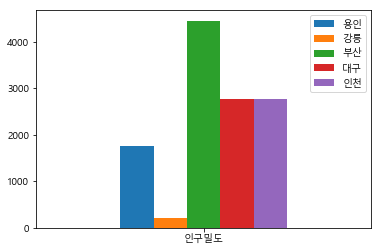

In [39]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
den_df.plot.bar(rot = 0)

### 2) 타 도시와 용인시의 범죄율 비교

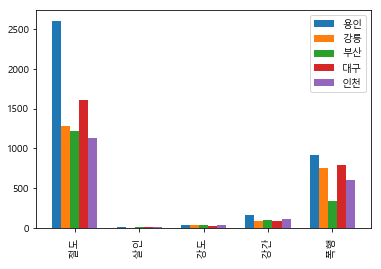

In [40]:
crime = crime.T
crime.plot.bar(width = 0.7)

### 5가지 범죄의 도시별 누적 그래프

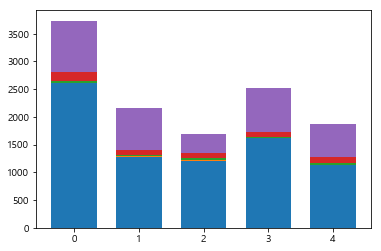

In [41]:
from numpy import array
from matplotlib import pyplot

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

W = 0.7
crime = crime.T

data1 = array(list(crime.iloc[:,0]))
pyplot.bar(range(len(data1)), data1, width = W)

data2 = array(list(crime.iloc[:,1]))
pyplot.bar([i for i in range(len(data2))], data2, width = W, bottom = data1)

data3 = array(list(crime.iloc[:,2]))
pyplot.bar([i for i in range(len(data3))], data3, width = W, bottom = data1 + data2)

data4 = array(list(crime.iloc[:,3]))

pyplot.bar([i for i in range(len(data4))], data4, width = W, bottom = data1 + data2 + data3)

data5 = array(list(crime.iloc[:,4]))
pyplot.bar([i for i in range(len(data5))], data5, width = W, bottom = data1 + data2 + data3 + data4)

pyplot.show()

### 3) 타 도시와 용인시의 교통사고 비율 비교

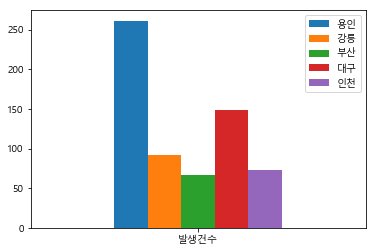

In [42]:
traffic_accident.plot.bar(rot = 0)

# (6) 결론: 본인의 명제/논리가 증명/확인 되었는지와 이를 구체적으로 서술함

___
### *분석 결과,*

### 인구 밀도 높은 순 : 부산, 인천, 대구, 용인, 강릉<br>
### 범죄율 낮은 순 : 부산, 인천, 강릉, 대구, 용인<br>
### 교통 사고 낮은 순 : 부산, 인천, 강릉, 대구, 용인<br><br>

이였으므로 강릉을 제외한 나머지 4개 도시(부산, 인천, 대구, 용인)은<br>
범죄율이 낮을수록 인구 밀도가 높고, 교통 사고가 낮을 수록 인구 밀도가 높은 것이 비례하는 것으로 드러났다.<br>
하지만 강릉은 비례하지 않았는데, 그 이유를 생각해보니 강릉은 산악 지대이고 다른 도시에 비해 제조업체 즉,<br>
공장이 적어 일자리가 없어 인구 밀도가 현저하게 낮았기 때문이라고 생각했다.<br>
또한 이러한 지형적, 사회적 이유로 인구 밀도가 높음이 살기 좋은 도시임이라는 명제가 거짓인 경우도 생길 수 있기 때문에<br>
**살기 좋은 도시임을 입증할 때 인구 밀도 대신 삶의 만족도와 같은 자료를 활용했으면 더 좋은 결과를 얻었을 것이라 생각했다.**<br> 
이번 프로젝트에서는 비슷한 시기의 각 도시 시민들의 삶의 만족도 자료를 찾지 못해 그 점이 한계라고 생각했다.

# (7) 참고문헌: 위의 작업을 위하여 획득한 자료, 인터넷 정보, 논문, 도서 등을 나열

### 참고 도서

In [43]:
reference_book = pd.read_csv('../data/reference_book.csv', index_col = 0, encoding = 'CP949')
reference_book = pd.DataFrame(reference_book)
reference_book

,도서 이름,출판사,저자
1,파이썬으로 데이터 주무르기,비제이퍼블릭,민형기
2,pandas로 하는 데이터 과학,에이콘,마이클 헤이트
3,파이썬 데이터 사이언스 핸드북,위키북스,제이크 밴더플래스


### 참고 사이트

* https://kkokkilkon.tistory.com/151<br>
* https://datasheet.tistory.com/8<br>
* https://sacko.tistory.com/18<br>
* https://3months.tistory.com/292<br>
* https://riptutorial.com/ko/pandas/example/10052/dtype-%EB%B3%80%EA%B2%BD%ED%95%98%EA%B8%B0<br>
* https://dandyrilla.github.io/2017-08-12/pandas-10min/<br>
* https://nittaku.tistory.com/110<br>
* https://nittaku.tistory.com/111<br>
* https://nittaku.tistory.com/113<br>
* https://nittaku.tistory.com/114<br>
* https://nittaku.tistory.com/121<br>
* https://nittaku.tistory.com/122<br>
* https://ssoonidev.tistory.com/68<br>
* https://pinkwink.kr/956<br>
* https://ordo.tistory.com/37<br>
* https://dandyrilla.github.io/2017-08-12/pandas-10min/<br>
* https://mellowlee.tistory.com/entry/Pandas-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B6%94%EC%B6%9C<br>
* https://freelife1191.github.io/dev/2018/05/06/dev-data_analysis-21.python_data_analysis/<br>
* https://yuddomack.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-replace-%EB%AC%B8%EC%9E%90%EC%97%B4-%EC%A0%9C%EA%B1%B0-%EC%88%98%EC%A0%95%EB%B3%80%ED%99%98<br>
* https://eunguru.tistory.com/221<br>
* https://pinkwink.kr/840<br>
* https://ssoonidev.tistory.com/52<br><br>

* https://thrillfighter.tistory.com/474<br>
* https://nittaku.tistory.com/117<br>
* https://m.blog.naver.com/PostView.nhn?blogId=cjh226&logNo=221266254398&proxyReferer=https%3A%2F%2Fwww.google.com%2F<br>
* https://codeday.me/ko/qa/20190501/434226.html<br>
* https://codeday.me/ko/qa/20190414/322863.html<br>
* https://blog.naver.com/cjh226/221266237919<br><br>

* http://kosis.kr/index/index.do<br>
* http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3<br>
* https://rfriend.tistory.com/tag/astype<br>

# (8) 별첨1: (3)의 획득한 데이터 원본

In [44]:
area = pd.read_csv('../data/2000_area.csv', index_col = 0, encoding = 'CP949')
area

,행정구역별(2),행정구역별(3),2000,2000.1,2000.2,2000.3,2000.4,2000.5,2000.6,2000.7,2000.8,2000.9,2000.10,2000.11,2000.12
행정구역별(1),,,,,,,,,,,,,,,
행정구역별(1),행정구역별(2),행정구역별(3),행정구역면적 (㎢),합계,합계,합계,한국인,한국인,한국인,한국인,외국인,외국인,외국인,인구밀도 (명/㎢),65세이상고령자 (명)
행정구역별(1),행정구역별(2),행정구역별(3),소계,인구 (명),인구 (명),인구 (명),세대수 (세대),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),인구 (명),소계,소계
행정구역별(1),행정구역별(2),행정구역별(3),소계,소계,남,여,소계,소계,남,여,소계,남,여,소계,소계
전국,소계,소계,50293.96,44639415,22428038,22211377,14572022,44413721,22296770,22116951,225694,131268,94426,887.57,2814727
시계,소계,소계,41166.1,42465118,21337640,21127478,13857968,42249529,21212299,21037230,215589,125341,90248,1031.56,2585779
시계,서울,소계,605.5,10373234,5198186,5175048,3540492,10311314,5166605,5144709,619250,31581,30339,17131.68,558566
시계,부산,소계,759.86,3812392,1905565,1906827,1199804,3796506,1897050,1899456,15886,8515,7371,5017.23,229075
시계,대구,소계,885.61,2538212,1276725,1261487,805779,2524253,1268348,1255905,13959,8377,5582,2866.06,149045
시계,인천,소계,964.53,2562321,1296053,1266268,829164,2545769,1284769,1261000,16552,11284,5268,2656.55,138316


In [45]:
crime_2008 = pd.read_csv('../data/2008_crime.csv', index_col = 0, encoding = 'CP949')
crime_2008

,서울특별시 종로,서울특별시 중구,서울특별시 용산,서울특별시 성동,서울특별시 광진,서울특별시 동대문,서울특별시 중랑,서울특별시 성북,서울특별시 강북,서울특별시 도봉,...,시흥,파주,양산,이천,구리,서산,제천,논산,기타도시,도시이외
2008년,,,,,,,,,,,,,,,,,,,,,
절도,977,"1,312",719,"1,190","2,110",741,"1,022","1,100",650,"1,148",...,"2,577","1,350",775,901,"1,575",851,625,674,"14,990","16,693"
장물,41,21,16,6,11,17,25,14,11,11,...,27,7,4,2,4,10,3,1,130,314
사기,"2,257","2,284","1,349","1,032","1,296","2,159","1,578","1,043","1,471",993,...,"2,190","1,349",793,470,914,887,469,578,"14,595","20,264"
횡령,226,272,174,156,157,236,161,133,181,118,...,208,179,109,82,86,57,37,72,"2,094","2,919"
배임,28,49,35,32,24,44,32,40,25,20,...,53,47,12,8,10,25,5,22,584,942
손괴,296,330,204,204,406,308,307,267,244,222,...,361,177,135,168,298,88,180,51,"2,785","2,428"
살인,8,5,7,2,3,10,7,10,8,9,...,12,11,6,4,1,4,7,7,96,114
강도,29,30,19,33,48,38,30,45,40,24,...,55,22,9,6,27,11,5,8,246,195
방화,13,21,21,10,7,24,10,14,14,17,...,14,11,9,2,18,9,4,5,152,167


In [46]:
crime_2010 = pd.read_csv('../data/2010_crime.csv', index_col = 0, encoding = 'CP949')
crime_2010

,서울특별시 종로,서울특별시 중구,서울특별시 용산,서울특별시 성동,서울특별시 광진,서울특별시 동대문,서울특별시 중랑,서울특별시 성북,서울특별시 강북,서울특별시 도봉,...,시흥,파주,양산,이천,구리,서산,제천,논산,기타도시,도시이외
2010년,,,,,,,,,,,,,,,,,,,,,
절도,"1,699","1,853","1,217","1,349","2,458","1,773","1,744","1,998","1,382","1,047",...,"1,740","1,122","1,624",797,"1,130",748,582,825,"17,395","33,561"
장물,86,23,47,7,22,25,16,8,9,5,...,17,34,16,3,11,3,4,3,174,292
사기,"1,769","2,360","1,467","1,012","1,818","2,103","1,614","1,127","1,688","1,072",...,"1,709","1,181",863,580,844,536,323,383,"13,982","23,427"
횡령,265,280,209,159,208,233,166,153,223,167,...,242,178,114,101,94,55,54,41,"2,351","2,934"
배임,50,76,46,24,37,50,19,30,26,29,...,34,37,20,24,12,18,10,15,"3,190","3,475"
손괴,362,322,271,296,442,296,507,374,306,222,...,485,317,268,198,273,157,149,73,"3,576","5,080"
살인,7,8,9,11,11,14,12,15,7,5,...,9,8,10,4,3,-,5,6,107,172
강도,32,27,40,29,52,57,33,34,35,16,...,68,15,21,20,27,9,6,18,205,379
방화,28,11,5,7,13,17,31,16,17,8,...,6,13,5,21,9,13,6,6,136,315


In [47]:
traffic_accident_2015 = pd.read_csv('../data/2015_traffic_accident.csv', index_col = 0, encoding = 'CP949')
traffic_accident_2015

,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,,,
서울,종로구,01월,88,0,119,33,64,22
서울,종로구,02월,82,1,114,27,69,18
서울,종로구,03월,121,0,181,48,112,21
서울,종로구,04월,136,0,188,45,117,26
서울,종로구,05월,137,0,192,43,119,30
서울,종로구,06월,100,0,149,45,84,20
서울,종로구,07월,111,2,154,36,104,14
서울,종로구,08월,113,1,148,38,91,19
서울,종로구,09월,141,1,173,35,108,30


In [48]:
population_2017 = pd.read_csv('../data/2017_population.csv', index_col = 0, encoding = 'CP949')
population_2017

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2017.13,2017.14,2017.15,2017.16,2017.17,2017.18,2017.19
행정구역별(읍면동),,,,,,,,,,,,,,,,,,,,
행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),가구-계 (가구),일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
전국,51422507,25768055,25654452,49943260,24922392,25020868,1479247,845663,633584,20167922,19673875,15949,478098,17122573,3963072,10375363,502514,2072905,208719,773847
읍부,4794377,2456558,2337819,4625994,2347613,2278381,168383,108945,59438,1846901,1798810,2277,45814,1749920,560283,959130,71398,131130,27979,62526
면부,4835090,2498157,2336933,4592308,2324414,2267894,242782,173743,69039,2052573,1993849,4055,54669,2064742,1538966,389938,34592,70152,31094,96877
동부,41793040,20813340,20979700,40724958,20250365,20474593,1068082,562975,505107,16268448,15881216,9617,377615,13307911,1863823,9026295,396524,1871623,149646,614444
서울특별시,9741871,4757642,4984229,9397944,4592393,4805551,343927,165249,178678,3948850,3813260,2246,133344,2866845,331863,1665922,114352,724932,29776,194627
종로구,157277,76670,80607,146298,71757,74541,10979,4913,6066,66711,62372,124,4215,45787,12920,14507,5451,11978,931,4859
중구,127896,62195,65701,117631,57391,60240,10265,4804,5461,56239,52208,89,3942,39512,6308,23874,1948,6491,891,4773
용산구,223898,108471,115427,207893,99759,108134,16005,8712,7293,96975,91102,85,5788,71356,14993,35648,3985,15988,742,4790


# (9) 별첨2: (4)의 가공된 데이터 원본

In [49]:
area = pd.read_csv('../data/2000_area.csv', index_col = 1, encoding = 'CP949')
busan_area_df = pd.DataFrame(area.iloc[6,2:3])
daegu_area_df = pd.DataFrame(area.iloc[7,2:3])
incheon_area_df = pd.DataFrame(area.iloc[8,2:3])
area = pd.read_csv('../data/2000_area.csv', index_col = 2, encoding = 'CP949')
yongin_area_df = pd.DataFrame(area.iloc[18,2:3])
gangneung_area_df = pd.DataFrame(area.iloc[41,2:3])
area = pd.concat([yongin_area_df, gangneung_area_df, busan_area_df, daegu_area_df, incheon_area_df], axis = 1)
area = area.astype(np.float64)
area = area.rename(index = {'2000': '면적'})
area

,용인시,강릉시,부산,대구,인천
면적,591.53,1040.09,759.86,885.61,964.53


In [50]:
population_density = pd.read_csv('../data/pop_density_19_04.csv', index_col = 0, encoding = 'CP949')
population = pd.DataFrame(population_density.iloc[0:1, :])
population = population.astype(np.float64)
population_density = pd.read_csv('../data/pop_density_19_04.csv', index_col = 0, encoding = 'CP949')
den_df = pd.DataFrame(population_density)
den_df = den_df.loc["인구밀도"]
den_df = pd.DataFrame(den_df)
den_df = den_df.T
new = pd.concat([population, den_df])
new

,용인,강릉,부산,대구,인천
인구수,1042229.00,213106.00,3431750.00,2454154.00,2956700.00
인구밀도,1762.31,204.91,4456.82,2777.76,2781.47


In [51]:
crime = pd.concat([yongin_mean, gangneung_mean, busan_mean, daegu_mean, incheon_mean], ignore_index = False)
crime = crime.T
crime

,용인,강릉,부산,대구,인천
절도,2604.0,1282.5,1211.466667,1610.857143,1129.611111
살인,10.0,3.5,7.900000,5.285714,6.000000
강도,36.5,30.5,34.366667,25.857143,30.055556
강간,166.5,82.5,94.933333,88.500000,105.611111
폭행,918.0,756.5,338.400000,793.857143,602.500000


In [52]:
traffic_accident = pd.concat([yongin_traffic, gangneung_traffic, busan_traffic, daegu_traffic, incheon_traffic])
traffic_accident = traffic_accident.iloc[:,0:1]
traffic_accident = traffic_accident.T
traffic_accident

,용인,강릉,부산,대구,인천
발생건수,261.0,91.333333,66.442708,148.208333,72.725


# (10) 별첨3: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본

#### X